In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch

In [2]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, radius='5 arcsec', spectro=True)
print(xid)

       ra              dec        ...     specobjid      run2d
---------------- ---------------- ... ------------------ -----
2.02344596573482 14.8398237551311 ... 845594848269461504    26


"It is also possible to download spectral templates from SDSS. To see what is available."

In [6]:
im = SDSS.get_images(matches=xid, band='g')
#sp = SDSS.get_spectra(matches=xid)
print(im)

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000022AE3898620>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000022ADFB19700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022ADFF9BD10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000022AE331CEC0>]]


In [8]:
template = im
print(template[0][0])

hdu_list = template[0][0]
image_data = hdu_list.data
print(image_data)

[[ 0.02539062  0.01313782 -0.00726318 ...  0.0100708   0.00603485
   0.00200272]
 [-0.02359009 -0.00726318  0.00089836 ... -0.01412964 -0.01412964
   0.01409912]
 [ 0.01313782  0.04986572  0.00906372 ... -0.01412964 -0.00606537
  -0.00606537]
 ...
 [-0.00865173  0.00358963  0.00358963 ...  0.0046463   0.00868225
   0.01675415]
 [-0.0004921  -0.01272583  0.01989746 ...  0.01675415  0.0046463
  -0.03167725]
 [-0.01681519  0.01174927  0.00766754 ...  0.02078247  0.00061321
   0.03692627]]


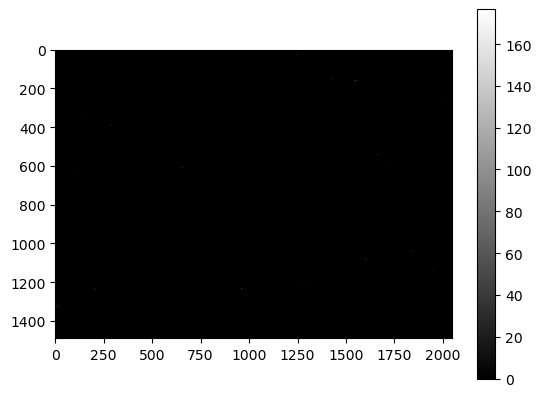

In [16]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

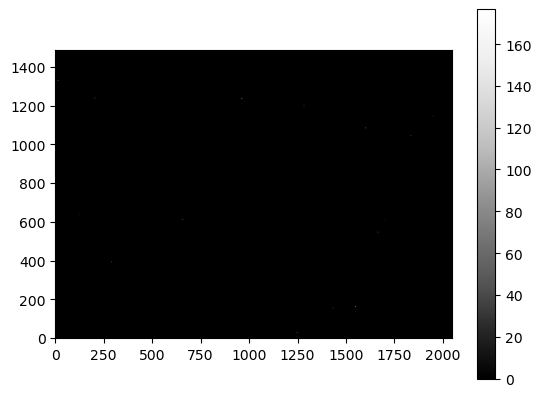

In [14]:
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_data, origin='lower', cmap='Greys_r')
plt.colorbar()
plt.show()